<h2>Exploratory Data Analysis</h2>

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r'train.csv',index_col=0)
test_data = pd.read_csv(r'test.csv',index_col=0)
sample_submission_data=pd.read_csv(r'sample_submission.csv')

In [3]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)
sample_submission_data_df=pd.DataFrame(sample_submission_data)

In [4]:
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
test_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [6]:
sample_submission_data_df.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [7]:
print(train_df.shape)
print(test_df.shape)
print(sample_submission_data_df.shape)

(300000, 10)
(200000, 9)
(200000, 2)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [9]:
train_df.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [10]:
train_df.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [11]:
test_df.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [12]:
train_df.describe(include='all')

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
count,290295,291653,293405,300000.000000,292556,292950,292030,290050,299862.000000,300000.000000
unique,5,4,3,NaN,2,2,3,6,NaN,NaN
top,Adidas,Polyester,Medium,NaN,Yes,Yes,Messenger,Pink,NaN,NaN
freq,60077,79630,101906,NaN,148342,148077,100031,51690,NaN,NaN
mean,NaN,NaN,NaN,5.443590,NaN,NaN,NaN,NaN,18.029994,81.411107
std,NaN,NaN,NaN,2.890766,NaN,NaN,NaN,NaN,6.966914,39.039340
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,5.000000,15.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,12.097867,47.384620
50%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,18.068614,80.956120
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,24.002375,115.018160


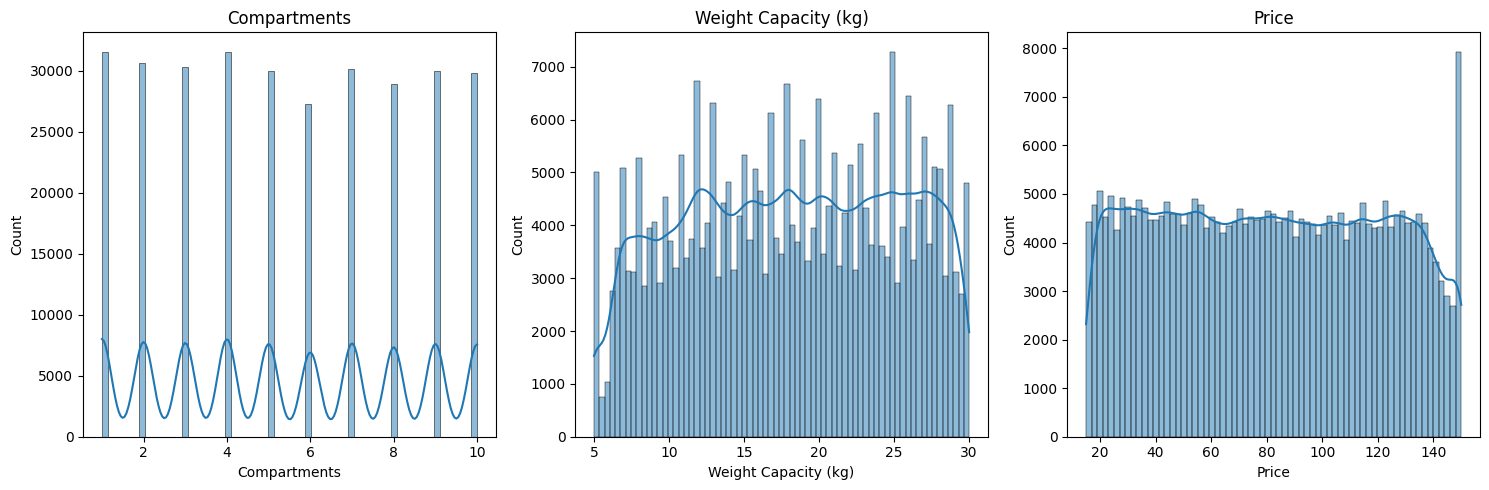

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_df['Compartments'], kde=True)
plt.title('Compartments')

plt.subplot(1, 3, 2)
sns.histplot(train_df['Weight Capacity (kg)'], kde=True)
plt.title('Weight Capacity (kg)')

plt.subplot(1, 3, 3)
sns.histplot(train_df['Price'], kde=True)
plt.title('Price')

plt.tight_layout()
plt.show()

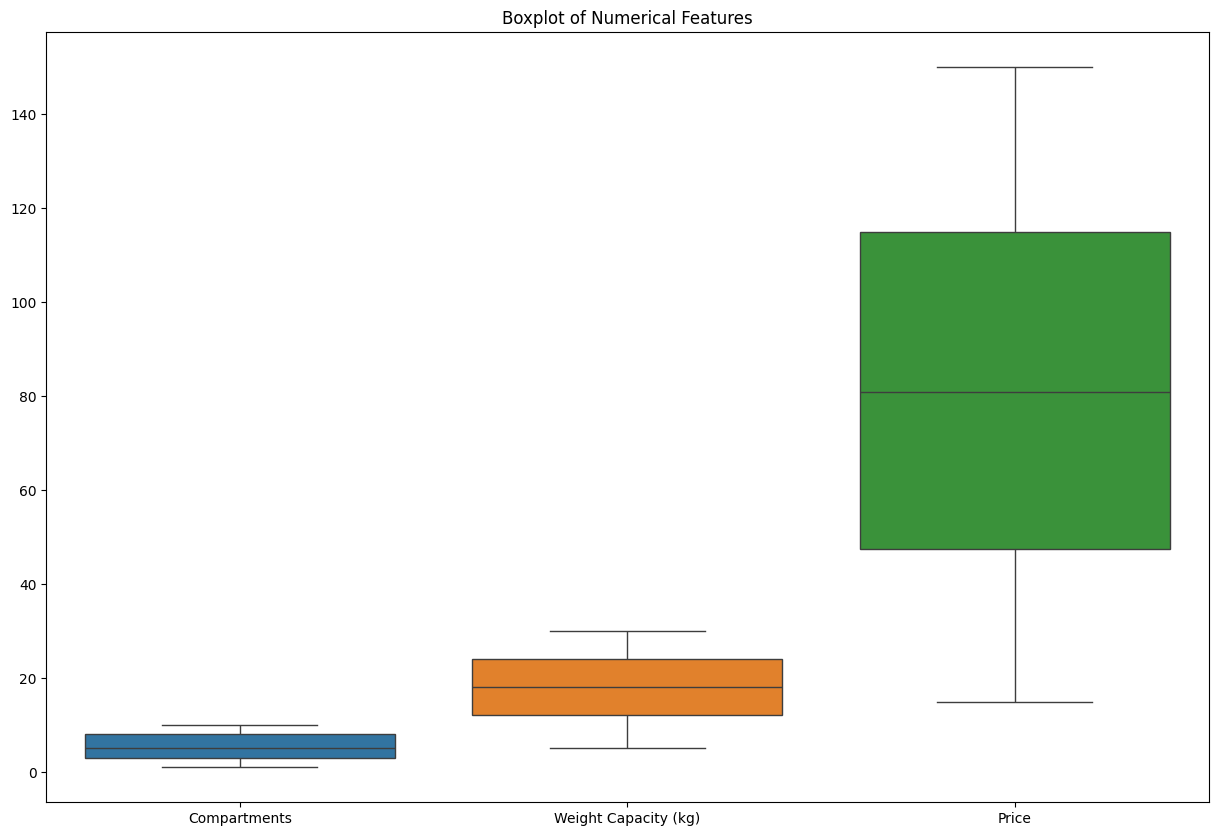

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[['Compartments', 'Weight Capacity (kg)', 'Price']])
plt.title('Boxplot of Numerical Features')
plt.show()

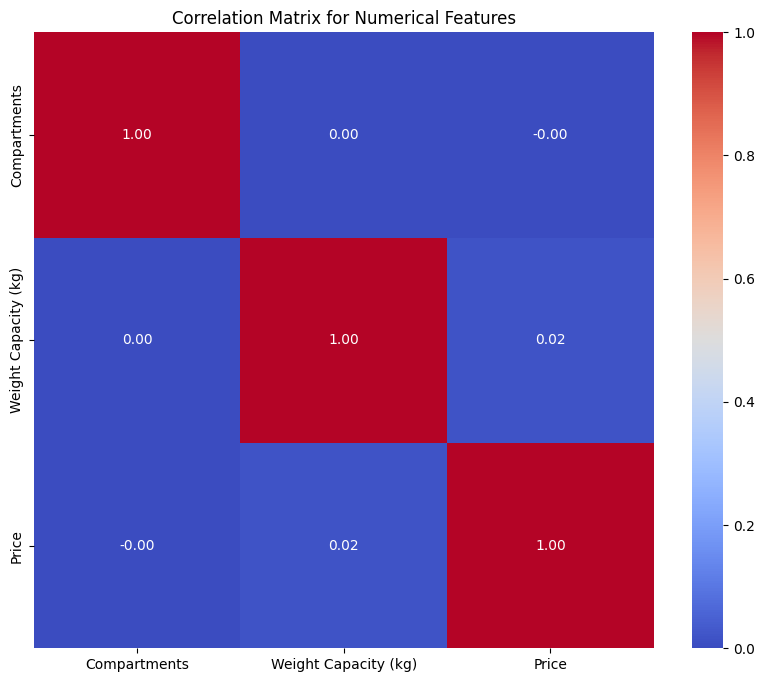

In [15]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [16]:
skewness = train_df[['Compartments', 'Weight Capacity (kg)', 'Price']].skew()
kurtosis = train_df[['Compartments', 'Weight Capacity (kg)', 'Price']].kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 Compartments            0.029125
Weight Capacity (kg)   -0.064239
Price                   0.036883
dtype: float64

Kurtosis:
 Compartments           -1.239242
Weight Capacity (kg)   -1.143903
Price                  -1.192733
dtype: float64


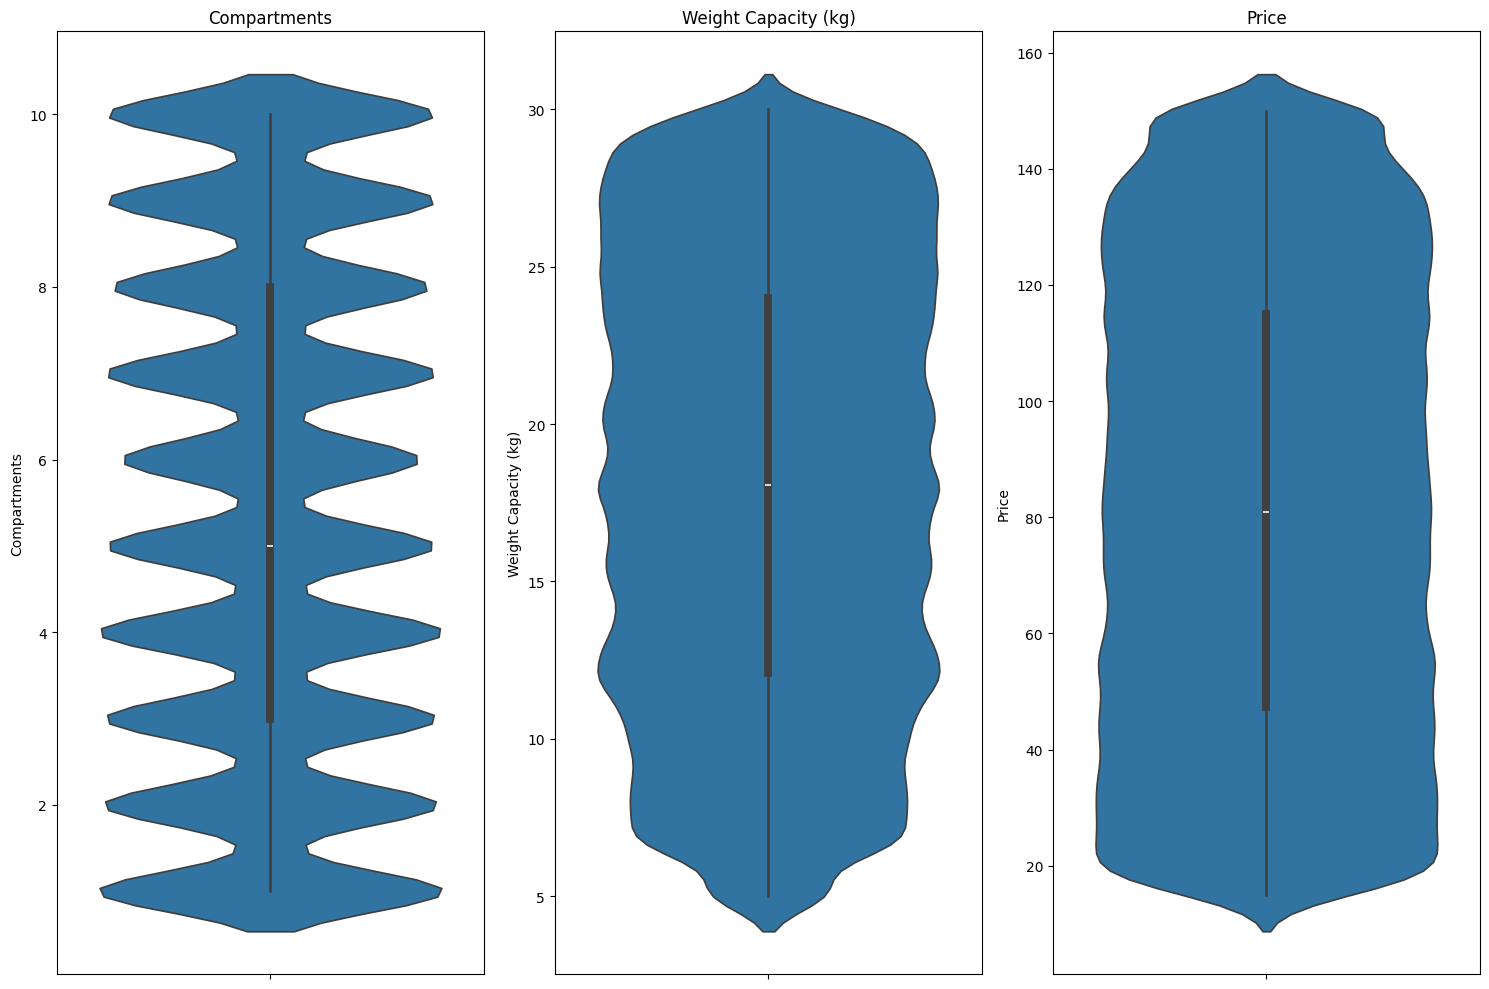

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.violinplot(y=train_df['Compartments'])
plt.title('Compartments')

plt.subplot(1, 3, 2)
sns.violinplot(y=train_df['Weight Capacity (kg)'])
plt.title('Weight Capacity (kg)')

plt.subplot(1, 3, 3)
sns.violinplot(y=train_df['Price'])
plt.title('Price')

plt.tight_layout()
plt.show()

In [18]:
categorical_cols = train_df.select_dtypes(include=['object'])

for col in categorical_cols.columns:
    print(f"Value counts for {col}:")
    print(train_df[col].value_counts())
    print("\n")

Value counts for Brand:
Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64


Value counts for Material:
Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64


Value counts for Size:
Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64


Value counts for Laptop Compartment:
Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64


Value counts for Waterproof:
Waterproof
Yes    148077
No     144873
Name: count, dtype: int64


Value counts for Style:
Style
Messenger    100031
Tote          97438
Backpack      94561
Name: count, dtype: int64


Value counts for Color:
Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: count, dtype: int64




In [19]:
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

for cat_col in categorical_columns:
    mean_price_by_category = train_df.groupby(cat_col)['Price'].mean()
    print(f"Mean Price grouped by {cat_col}:\n", mean_price_by_category, "\n")

Mean Price grouped by Brand:
 Brand
Adidas          80.631060
Jansport        81.791276
Nike            81.319209
Puma            81.448607
Under Armour    81.976311
Name: Price, dtype: float64 

Mean Price grouped by Material:
 Material
Canvas       82.106511
Leather      80.437883
Nylon        81.024760
Polyester    82.033315
Name: Price, dtype: float64 

Mean Price grouped by Size:
 Size
Large     81.651446
Medium    81.343418
Small     81.424674
Name: Price, dtype: float64 

Mean Price grouped by Laptop Compartment:
 Laptop Compartment
No     81.464702
Yes    81.463842
Name: Price, dtype: float64 

Mean Price grouped by Waterproof:
 Waterproof
No     81.572050
Yes    81.403489
Name: Price, dtype: float64 

Mean Price grouped by Style:
 Style
Backpack     81.402513
Messenger    81.410925
Tote         81.374865
Name: Price, dtype: float64 

Mean Price grouped by Color:
 Color
Black    80.513439
Blue     82.006994
Gray     80.851971
Green    82.381308
Pink     81.630864
Red      81.01

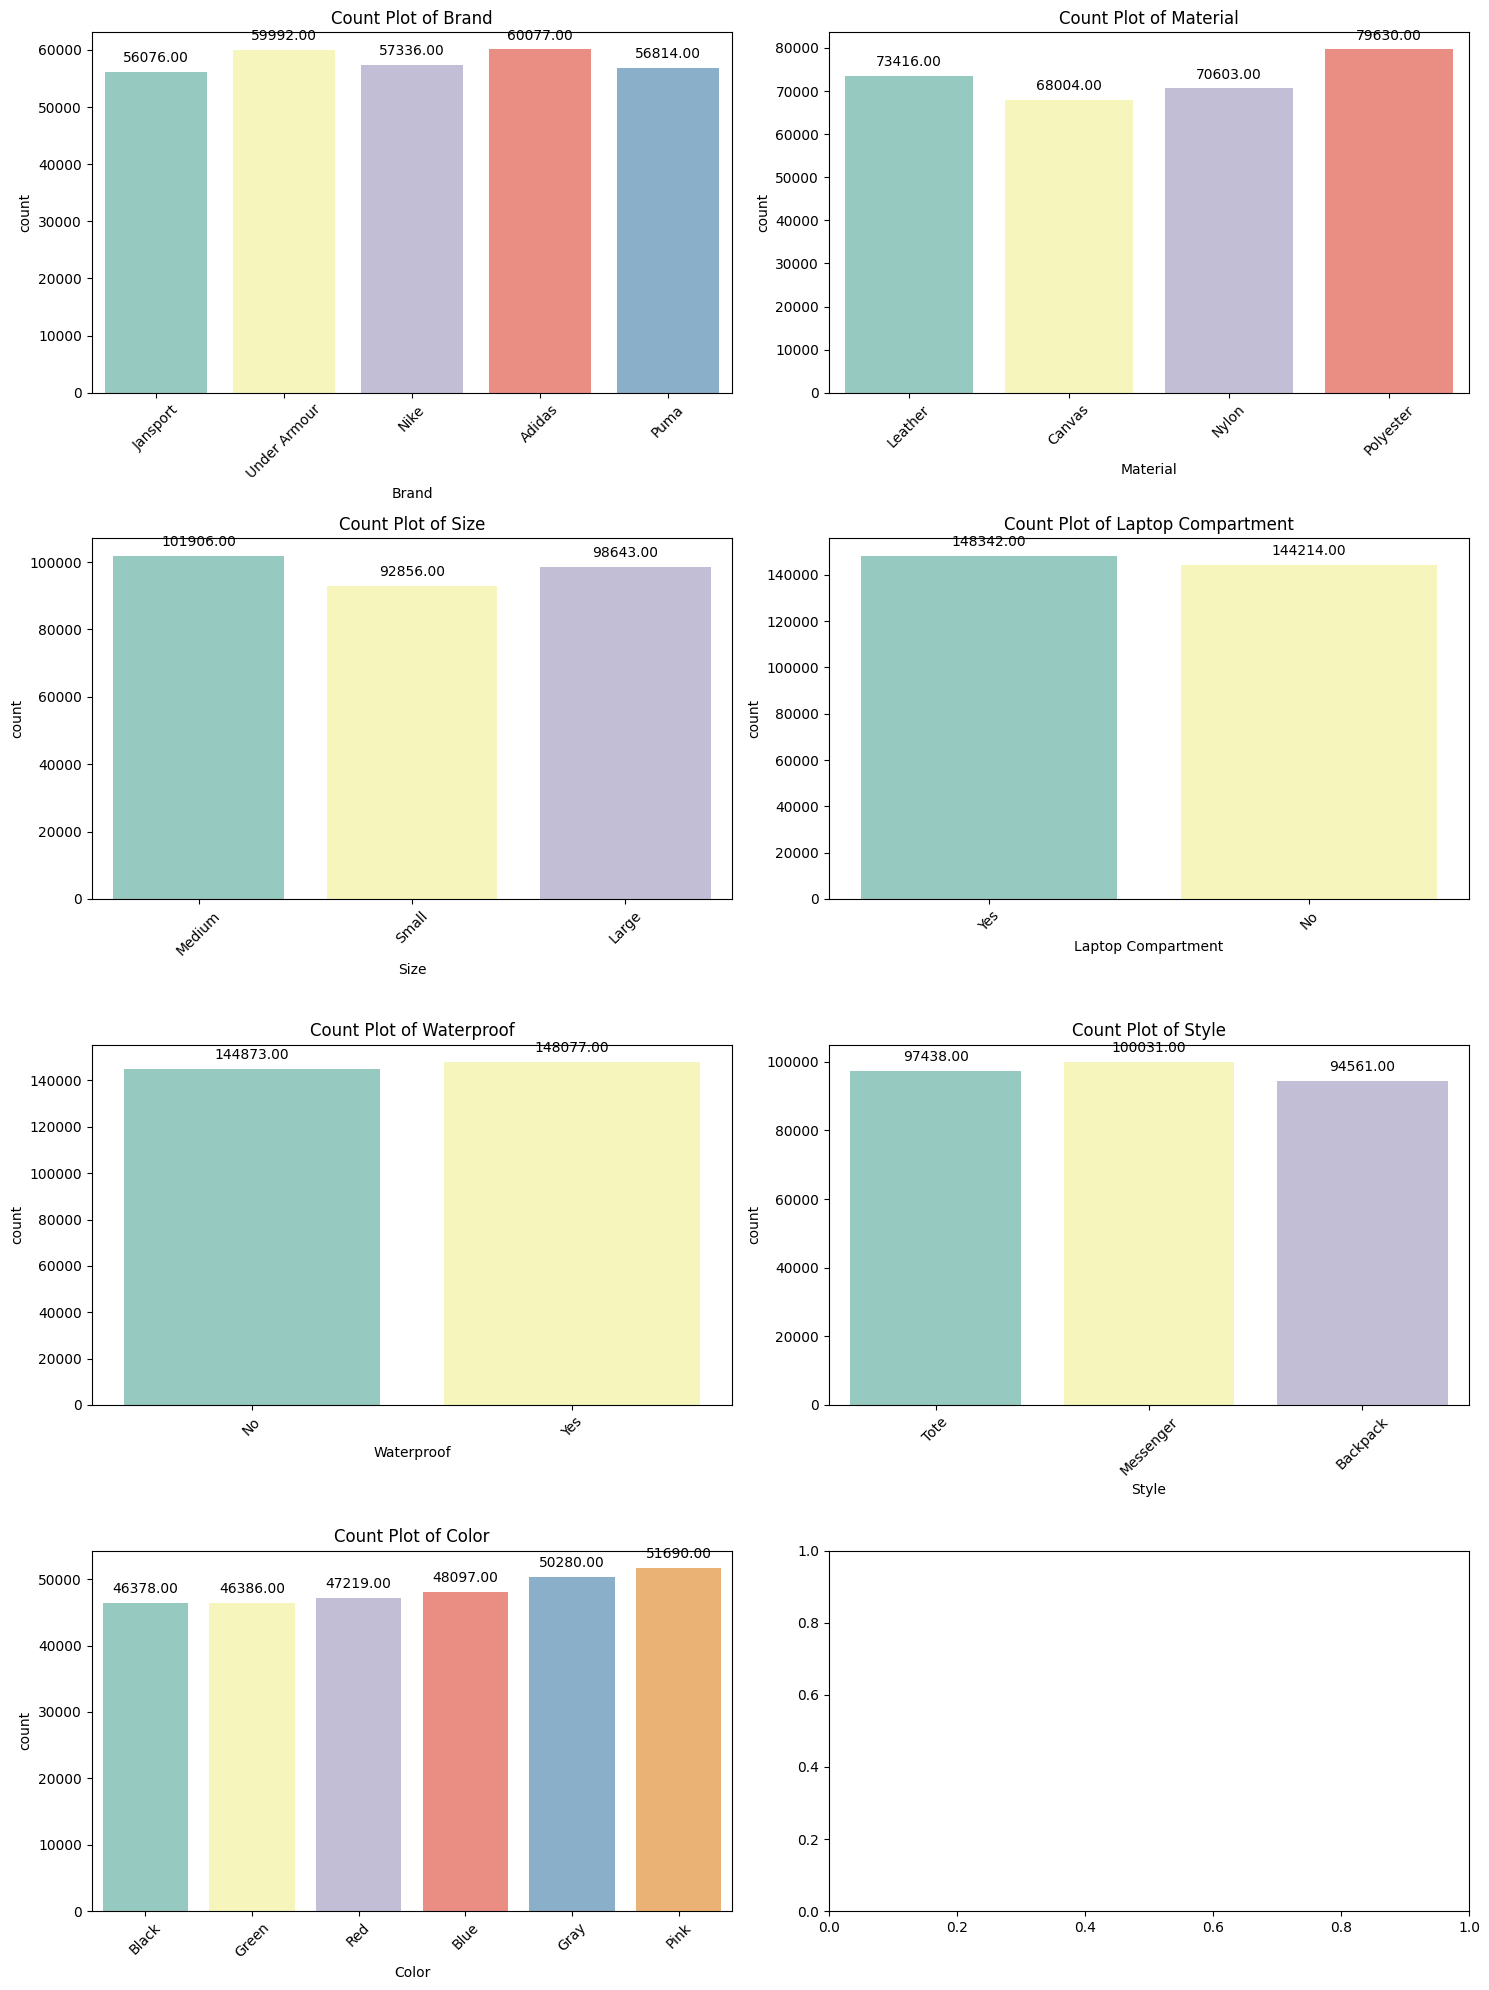

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots((len(categorical_columns) + 1) // 2, 2, 
                        figsize=(15, (len(categorical_columns) + 1) // 2 * 5))

r, c = 0, 0  

for i, col in enumerate(categorical_columns):
    if c == 2:
        c = 0
        r += 1

    unique_values = train_df[col].nunique() 

    palette = sns.color_palette("Set3", unique_values)
    
    counts = sns.countplot(ax=axs[r, c], data=train_df, x=col, hue=col, 
                           palette=palette, legend=False)

    for p in counts.patches:
        counts.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', 
                        xytext=(0, 10), textcoords='offset points')

    axs[r, c].set_title(f'Count Plot of {col}')
    axs[r, c].tick_params(axis='x', rotation=45)

    c += 1  

plt.tight_layout()
plt.show()


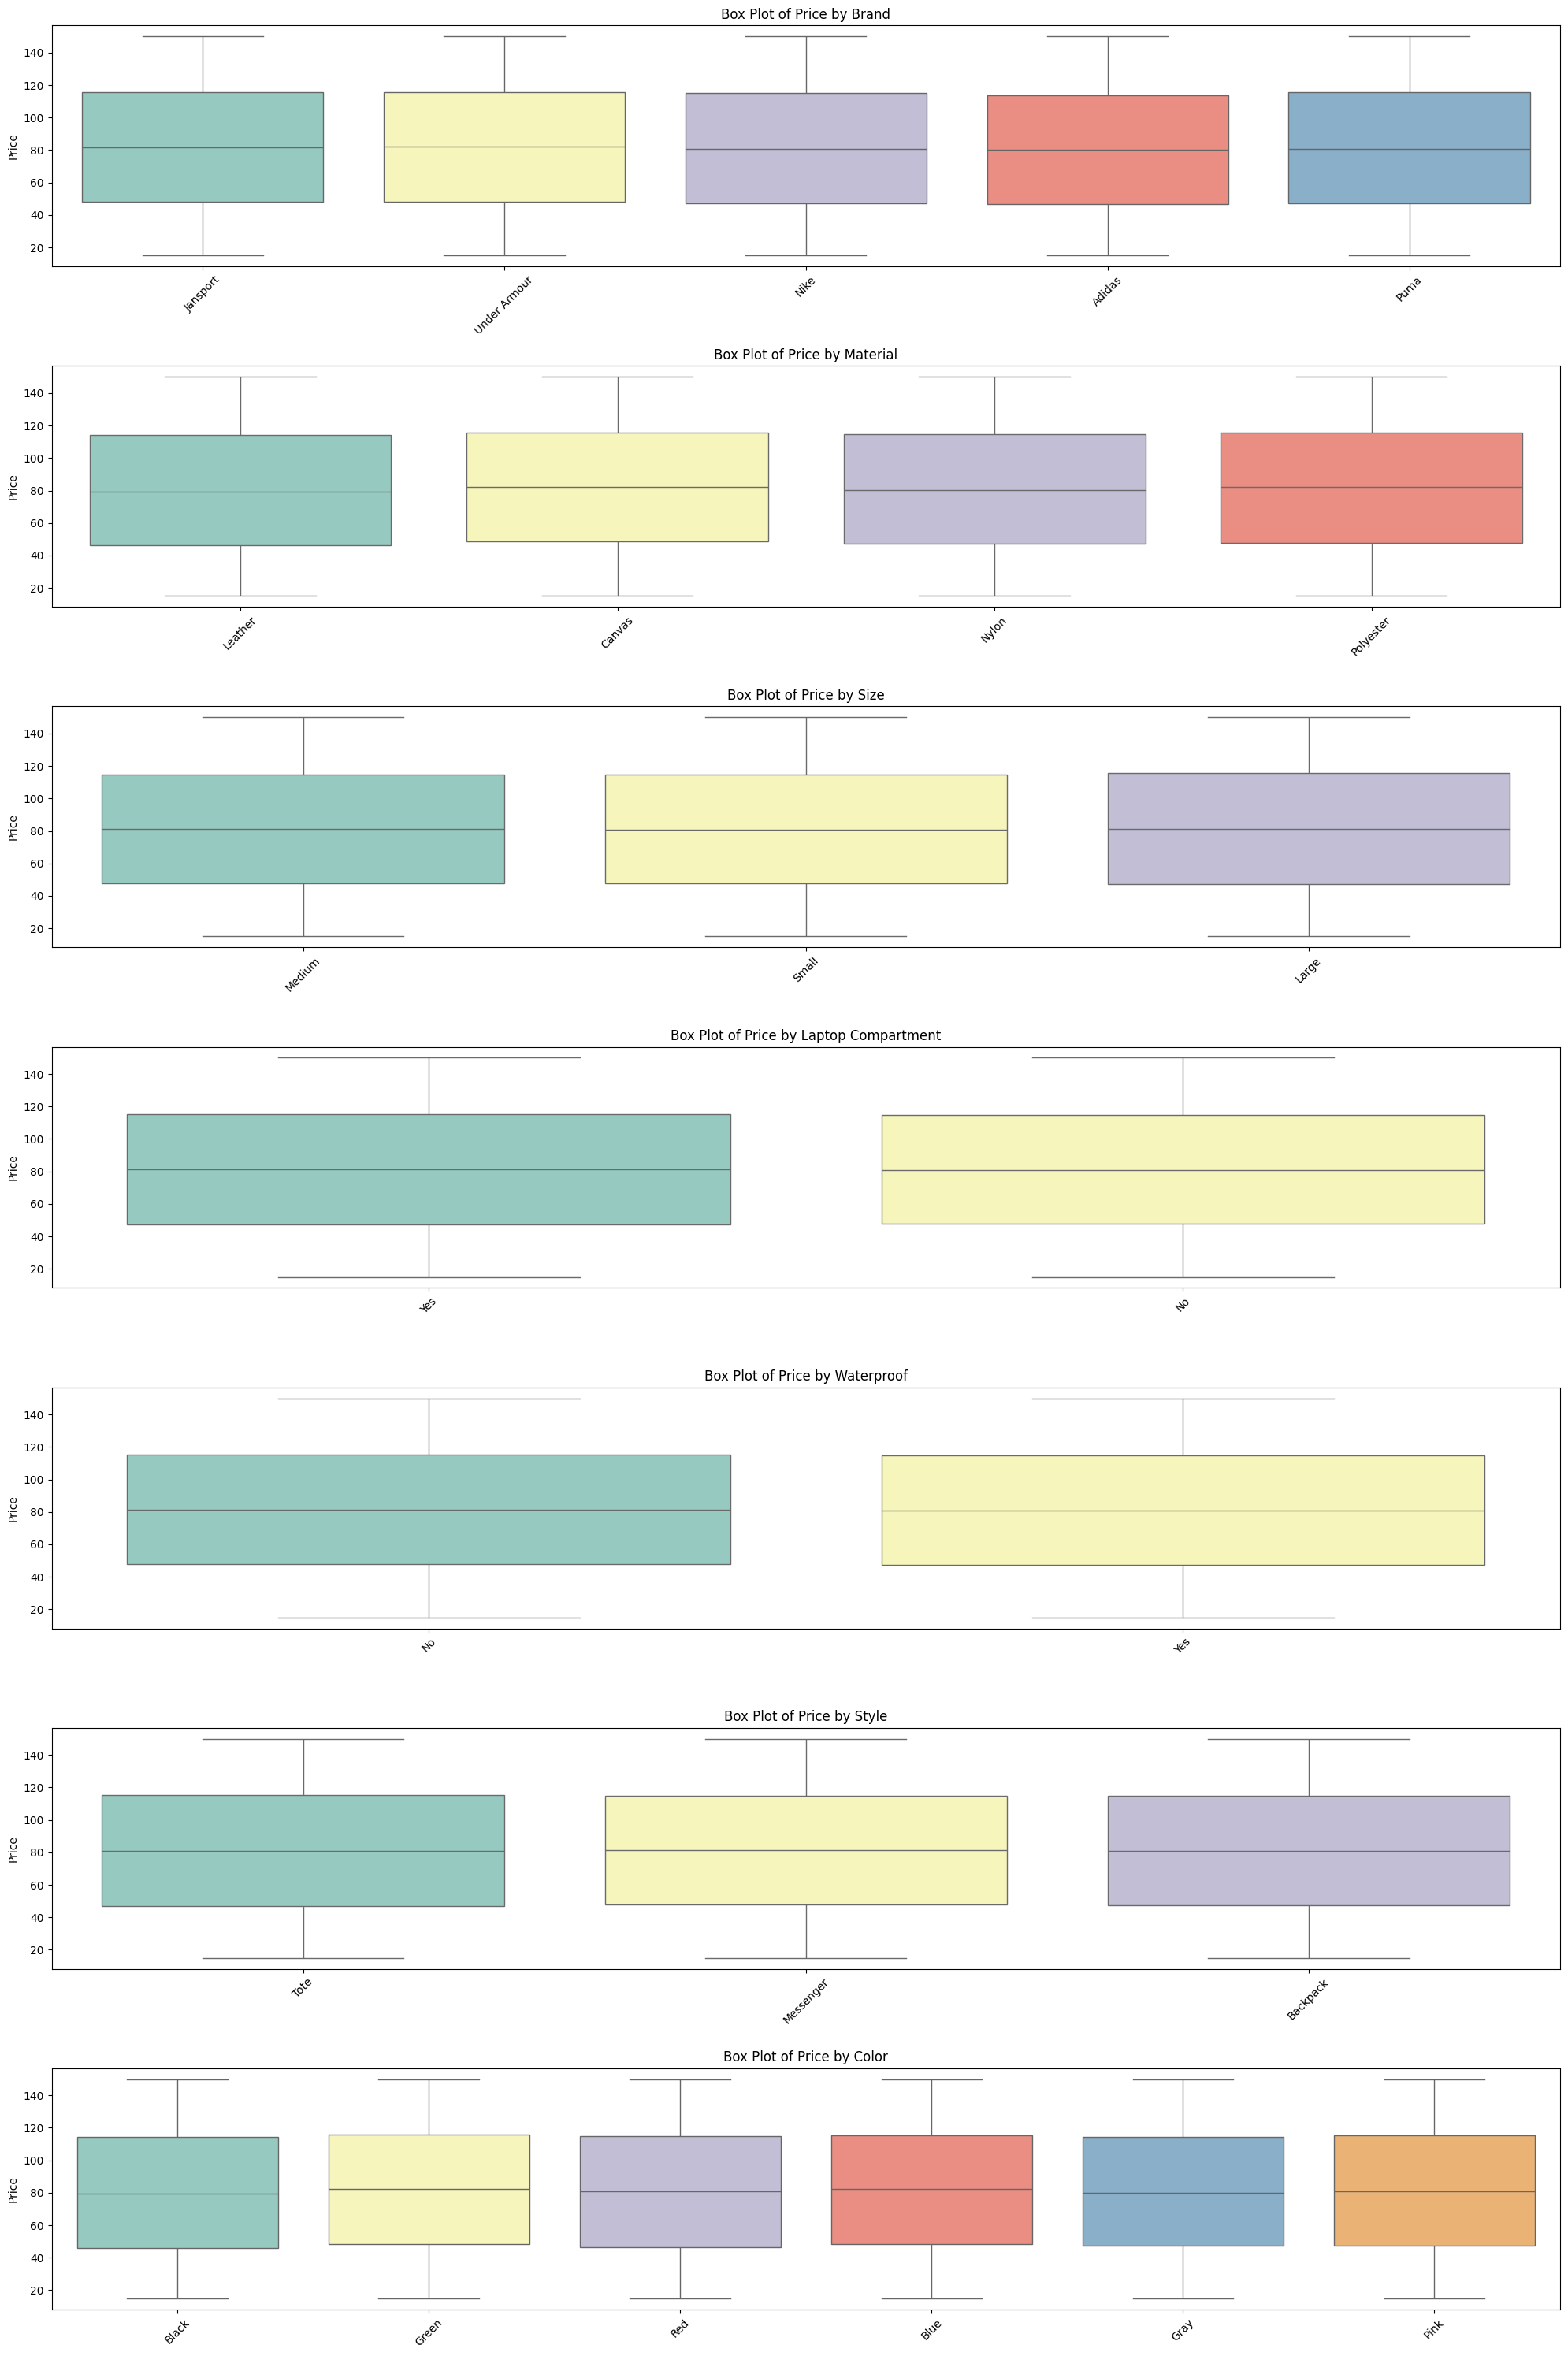

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(20, 30))

for i, col in enumerate(categorical_columns):
    sns.boxplot(ax=axs[i],
                x=col,
                y='Price',
                data=train_df,
                hue=col,
                palette='Set3',
                dodge=False)
    
    if axs[i].get_legend() is not None:
        axs[i].get_legend().remove()
    
    axs[i].set_title(f'Box Plot of Price by {col}')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set(xlabel=None)

plt.tight_layout()
plt.show()
